In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from predcontrol_sf.control import User, Control
import predcontrol_sf.value_curves as vc
from predcontrol_sf.data_loader import load_data_bom_aus
from pathlib import Path
import datetime as dt


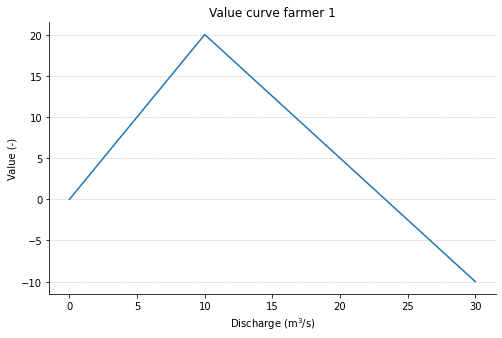

In [2]:
influx = np.linspace(0,30,100)
plt.figure(figsize=(8,5))
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(influx, [vc.value_curve_farmer_1(i) for i in influx])
plt.title('Value curve farmer 1')
plt.xlabel('Discharge (m$^3$/s)')
plt.ylabel('Value (-)')
plt.grid(linestyle= ':', axis='y')
plt.savefig(r"C:\Users\sgnodde\Documents\data\Murray project\vcf1.png", dpi=200)

c:\users\sgnodde\documents\git\str-flow-pred-and-control\predcontrol_sf\physics.py:14: RuntimeWarning: invalid value encountered in power
  q = 2 / 3 * cd * b * (2 * g) ** 0.5 * h ** 1.5


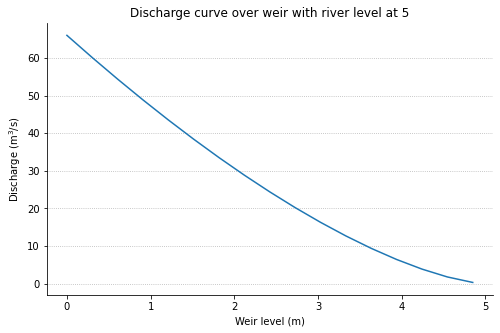

In [3]:
level_over_weir = np.linspace(0,9,100)

plt.figure(figsize=(8,5))
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(influx, [vc.discharge_curve_farmer_1(5,i, 2) for i in influx])
plt.title("Discharge curve over weir with river level at 5")
plt.ylabel('Discharge (m$^3$/s)')
plt.xlabel('Weir level (m)')
plt.grid(linestyle= ':', axis='y')
plt.savefig(r"C:\Users\sgnodde\Documents\data\Murray project\dcf1.png", dpi=200)

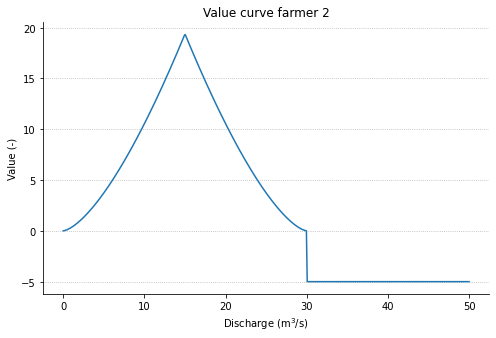

In [4]:
influx = np.linspace(0,50,500)
plt.figure(figsize=(8,5))

ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(influx, [vc.value_curve_farmer_2(i) for i in influx])
plt.title('Value curve farmer 2')
plt.xlabel('Discharge (m$^3$/s)')
plt.ylabel('Value (-)')
plt.grid(linestyle= ':', axis='y')
plt.savefig(r"C:\Users\sgnodde\Documents\data\Murray project\vcf2.png", dpi=200)

## Make users

In [4]:
user1 = User(vc.value_curve_farmer_1, discharge_curve=vc.discharge_curve_farmer_1)
user2 = User(vc.value_curve_farmer_2)

In [5]:
ctrl = Control([user1, user2])

In [6]:
ctrl.return_combined_value(1, [None, 10], [0.5, None])

25.17399355799961

In [7]:
ctrl.return_combined_value([1.1,0.8,1.5], [None, [10,5,10]], [[0.5, 0.4, 0.3], None])

array([26.48685702,  8.98666667, 36.51917524])

In [8]:
data_folder = Path(r"C:\Users\sgnodde\Documents\data\data_murray_boundary_bend")
bb_discharge = load_data_bom_aus(data_folder / 'bb_discharge.csv')
level = load_data_bom_aus(data_folder / 'bb_level.csv')

<AxesSubplot:xlabel='date'>

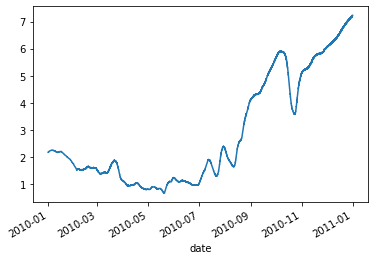

In [9]:
level['Value']['2010'].plot()


<AxesSubplot:xlabel='date'>

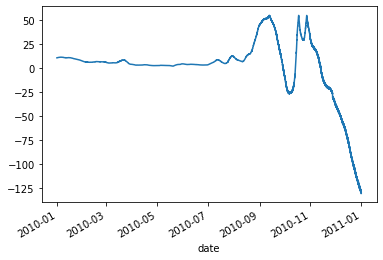

In [12]:
weir_setting = level['Value']['2010'].copy() # eerst hele jaar vast
intake_discharge = level['Value']['2010'].copy()*3
weir_setting[:] = 3
values = ctrl.return_combined_value(level['Value']['2010'], [None, intake_discharge], [weir_setting, None])
values = pd.Series(values, index=level.loc['2010'].index)
values.plot()

In [14]:
level.index


DatetimeIndex(['1975-04-17 14:15:00+10:00', '1975-04-17 16:09:00+10:00',
               '1975-04-17 18:04:00+10:00', '1975-04-17 19:58:00+10:00',
               '1975-04-17 21:52:00+10:00', '1975-04-17 23:47:00+10:00',
               '1975-04-18 01:41:00+10:00', '1975-04-18 03:35:00+10:00',
               '1975-04-18 05:29:00+10:00', '1975-04-18 07:24:00+10:00',
               ...
               '2022-01-17 08:00:00+10:00', '2022-01-17 08:15:00+10:00',
               '2022-01-17 08:30:00+10:00', '2022-01-17 08:45:00+10:00',
               '2022-01-17 09:00:00+10:00', '2022-01-17 09:15:00+10:00',
               '2022-01-17 09:30:00+10:00', '2022-01-17 09:45:00+10:00',
               '2022-01-17 10:00:00+10:00', '2022-01-17 10:00:01+10:00'],
              dtype='datetime64[ns, pytz.FixedOffset(600)]', name='date', length=522046, freq=None)

## Make basic dataset

In [25]:
riverdata = pd.DataFrame({'level':level['Value'], 'discharge':bb_discharge['Value']}, index = level.index)
riverdata = riverdata.loc['2011': ]
riverdata

,level,discharge
date,,
2011-01-01 00:00:00+10:00,7.216,589.060
2011-01-01 00:15:00+10:00,7.227,591.173
2011-01-01 00:30:00+10:00,7.218,589.444
2011-01-01 00:45:00+10:00,7.224,590.596
2011-01-01 01:00:00+10:00,7.213,588.485
...,...,...
2022-01-17 09:15:00+10:00,3.718,217.813
2022-01-17 09:30:00+10:00,3.718,217.813
2022-01-17 09:45:00+10:00,3.717,217.735


In [43]:
riverdata['disch_farmer_2'] = np.NaN
riverdata['wl_farmer_1'] = np.NaN
riverdata['value'] = 0
riverdata

# TODO: add discharge minimal going through

,level,discharge,disch_farmer_2,wl_farmer_1,Value,value
date,,,,,,
2011-01-01 00:00:00+10:00,7.216,589.060,NaN,NaN,0,0
2011-01-01 00:15:00+10:00,7.227,591.173,NaN,NaN,0,0
2011-01-01 00:30:00+10:00,7.218,589.444,NaN,NaN,0,0
2011-01-01 00:45:00+10:00,7.224,590.596,NaN,NaN,0,0
2011-01-01 01:00:00+10:00,7.213,588.485,NaN,NaN,0,0
...,...,...,...,...,...,...
2022-01-17 09:15:00+10:00,3.718,217.813,NaN,NaN,0,0
2022-01-17 09:30:00+10:00,3.718,217.813,NaN,NaN,0,0
2022-01-17 09:45:00+10:00,3.717,217.735,NaN,NaN,0,0


## Make dates for new settings

In [44]:
days_setting = 14
newsettingdates = [riverdata.index[4*24*days_setting]+days_setting*dt.timedelta(days=1)*i for i in range(11*int(365/days_setting))]

In [45]:
for newsettingdate in newsettingdates:
    level_weir = np.random.uniform(0,4)
    discharge = np.random.uniform(0,30)
    riverdata.loc[newsettingdate, 'wl_farmer_1'] = level_weir
    riverdata.loc[newsettingdate,'disch_farmer_2'] = discharge
riverdata

,level,discharge,disch_farmer_2,wl_farmer_1,Value,value
date,,,,,,
2011-01-01 00:00:00+10:00,7.216,589.060,NaN,NaN,0,0
2011-01-01 00:15:00+10:00,7.227,591.173,NaN,NaN,0,0
2011-01-01 00:30:00+10:00,7.218,589.444,NaN,NaN,0,0
2011-01-01 00:45:00+10:00,7.224,590.596,NaN,NaN,0,0
2011-01-01 01:00:00+10:00,7.213,588.485,NaN,NaN,0,0
...,...,...,...,...,...,...
2022-01-17 09:15:00+10:00,3.718,217.813,NaN,NaN,0,0
2022-01-17 09:30:00+10:00,3.718,217.813,NaN,NaN,0,0
2022-01-17 09:45:00+10:00,3.717,217.735,NaN,NaN,0,0


<AxesSubplot:xlabel='date'>

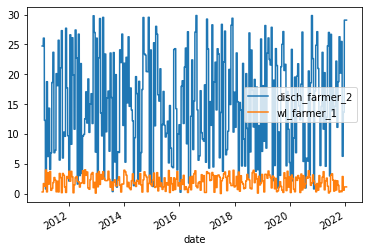

In [46]:
riverdata[['disch_farmer_2','wl_farmer_1']] = riverdata[['disch_farmer_2','wl_farmer_1']].ffill()
riverdata[['disch_farmer_2','wl_farmer_1']].plot()

In [48]:
values = ctrl.return_combined_value(riverdata['level'],
        [None, riverdata['disch_farmer_2']],
        [riverdata['wl_farmer_1'], None])
riverdata['value'] = values

c:\users\sgnodde\documents\git\str-flow-pred-and-control\predcontrol_sf\physics.py:14: RuntimeWarning: invalid value encountered in power
  q = 2 / 3 * cd * b * (2 * g) ** 0.5 * h ** 1.5


<AxesSubplot:xlabel='date'>

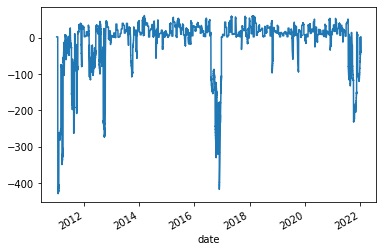

In [50]:
riverdata['value'].plot()

<AxesSubplot:xlabel='date'>

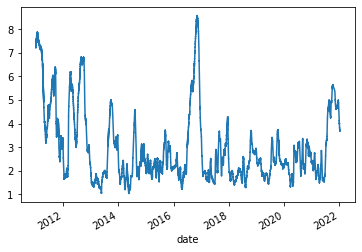

In [52]:
riverdata['level'].plot()